In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
patients = pd.read_csv('../data/raw/patients.csv')
encounters = pd.read_csv('../data/raw/encounters.csv')
conditions = pd.read_csv('../data/raw/conditions.csv')

In [3]:
patients.shape

(1163, 25)

In [4]:
encounters.shape

(61459, 15)

In [5]:
conditions.shape

(38094, 6)

In [7]:
# check columns in patients csv
print("Patients Tables:",patients.columns.tolist())

Patients Tables: ['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']


In [8]:
# check columns in encounters csv
print("Encounters Tables:",encounters.columns.tolist())

Encounters Tables: ['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER', 'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION']


In [9]:
# check columns in conditions csv
print("Conditions Tables:",conditions.columns.tolist())

Conditions Tables: ['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION']


In [10]:
# see actual data samples in patients csv
print ("Patients Samples:",patients.head(3))

Patients Samples:                                      Id   BIRTHDATE DEATHDATE          SSN  \
0  b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85  2019-02-17       NaN  999-65-3251   
1  c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8  2005-07-04       NaN  999-49-3323   
2  339144f8-50e1-633e-a013-f361391c4cff  1998-05-11       NaN  999-10-8743   

     DRIVERS    PASSPORT PREFIX     FIRST            LAST SUFFIX  ...  \
0        NaN         NaN    NaN  Damon455      Langosh790    NaN  ...   
1  S99941126         NaN    NaN     Thi53       Wunsch504    NaN  ...   
2  S99996708  X75063318X    Mr.    Chi716  Greenfelder433    NaN  ...   

                         BIRTHPLACE                           ADDRESS  \
0  Middleborough  Massachusetts  US            620 Lynch Tunnel Apt 0   
1        Danvers  Massachusetts  US       972 Tillman Branch Suite 48   
2     Athens  Athens Prefecture  GR  1060 Bernhard Crossroad Suite 15   

          CITY          STATE          COUNTY     ZIP        LAT        LON  \
0  S

In [11]:
# see actual data samples in encounters csv
print ("Encounters Samples:",encounters.head(3))

Encounters Samples:                                      Id                 START  \
0  748f8357-6cc7-551d-f31a-32fa2cf84126  2019-02-17T05:07:38Z   
1  5a4735ae-423f-6563-28ab-b3d11b49b2d4  2019-03-24T05:07:38Z   
2  0bee1ce6-3e2c-5506-f71c-a7ba8f64a3d3  2019-05-26T05:07:38Z   

                   STOP                               PATIENT  \
0  2019-02-17T05:22:38Z  b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85   
1  2019-03-24T05:22:38Z  b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85   
2  2019-05-26T05:22:38Z  b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85   

                           ORGANIZATION                              PROVIDER  \
0  f7ae497d-8dc6-3721-9402-43b621a4e7d2  82608ebb-037c-3cef-9d34-3736d69b29e8   
1  f7ae497d-8dc6-3721-9402-43b621a4e7d2  82608ebb-037c-3cef-9d34-3736d69b29e8   
2  f7ae497d-8dc6-3721-9402-43b621a4e7d2  82608ebb-037c-3cef-9d34-3736d69b29e8   

                                  PAYER ENCOUNTERCLASS       CODE  \
0  7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a       wellness  41062000

In [12]:
# see actual data samples in conditions csv
print ("Conditions Samples:",conditions.head(3))

Conditions Samples:         START        STOP                               PATIENT  \
0  2013-06-24  2013-07-02  c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
1  2016-02-27  2016-03-14  c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   
2  2016-08-11  2016-08-22  c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8   

                              ENCOUNTER       CODE  \
0  0b2794bd-ec2b-d34f-0610-2523b3b7fcf0   10509002   
1  a6d818dd-0983-fd1c-eefa-3d2295532c45  283371005   
2  36d2e781-4655-0a11-1f70-c69856e02019  444814009   

                   DESCRIPTION  
0  Acute bronchitis (disorder)  
1        Laceration of forearm  
2   Viral sinusitis (disorder)  


In [13]:
# check encounter types 
print ("Encounter Type Distribution:")
encounters['ENCOUNTERCLASS'].value_counts()

Encounter Type Distribution:


ENCOUNTERCLASS
wellness      24038
ambulatory    20124
outpatient    10837
urgentcare     2564
emergency      2168
inpatient      1728
Name: count, dtype: int64

In [23]:
# filter inpatients
inpatient_encounters =encounters[encounters.ENCOUNTERCLASS == 'inpatient'].copy()
print("Total Inpatient Encounters:",len(inpatient_encounters))

Total Inpatient Encounters: 1728


In [18]:
display(inpatient_encounters.head())

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
358,2912a67c-399a-c170-bbc3-1ac33171a249,2020-02-22T01:17:19Z,2020-02-23T01:17:19Z,97a20cf9-630d-939c-2f50-f13c434aee2f,69176529-fd1f-3b3f-abce-a0a3626769eb,3aade15e-5333-3c4e-86c5-aab3511bc8e8,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,inpatient,305408004,Admission to surgical department,129.16,10702.63,0.0,NaN,NaN
389,9ef46bc5-fbd9-b925-9942-6ab651f58ead,2006-02-18T21:56:43Z,2006-02-19T21:56:43Z,55a6a46e-a1a4-0298-e58f-c0cb27cbb022,d733d4a9-080d-3593-b910-2366e652b7ea,db26a5ae-8026-3002-b849-2f4f1d6f1cb1,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,inpatient,185347001,Encounter for problem,77.49,55941.05,0.0,94260004.0,Secondary malignant neoplasm of colon
606,b6358095-06f1-cc6a-ac12-3d46550a254a,2021-02-08T17:17:44Z,2021-02-20T17:37:23Z,8fa5a097-1970-9370-4193-a7baa3d235b5,d692e283-0833-3201-8e55-4f868a9c0736,faa87618-81eb-3ac8-923b-bf203be11e67,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,inpatient,1505002,Hospital admission for isolation (procedure),129.16,23128.21,0.0,840539006.0,COVID-19
628,e274dd40-5830-c480-0804-104c0ca10350,2021-02-20T17:37:23Z,2021-02-24T17:37:23Z,8fa5a097-1970-9370-4193-a7baa3d235b5,d692e283-0833-3201-8e55-4f868a9c0736,faa87618-81eb-3ac8-923b-bf203be11e67,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,inpatient,305351004,Admission to intensive care unit (procedure),129.16,2712.41,0.0,840539006.0,COVID-19
634,48a5f438-d28e-d970-90eb-d077f19ffac2,2021-02-24T17:37:23Z,2021-02-26T17:37:23Z,8fa5a097-1970-9370-4193-a7baa3d235b5,d692e283-0833-3201-8e55-4f868a9c0736,faa87618-81eb-3ac8-923b-bf203be11e67,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,inpatient,76464004,Hospital admission for observation (procedure),129.16,129.16,0.0,840539006.0,COVID-19


In [24]:
# check start-stop dates
print("Dates in the first 5 records:", inpatient_encounters[['START', 'STOP']].head())

Dates in the first 5 records:                     START                  STOP
358  2020-02-22T01:17:19Z  2020-02-23T01:17:19Z
389  2006-02-18T21:56:43Z  2006-02-19T21:56:43Z
606  2021-02-08T17:17:44Z  2021-02-20T17:37:23Z
628  2021-02-20T17:37:23Z  2021-02-24T17:37:23Z
634  2021-02-24T17:37:23Z  2021-02-26T17:37:23Z


In [25]:
# fix date formats
inpatient_encounters['START'] = pd.to_datetime(inpatient_encounters['START'])
inpatient_encounters['STOP'] = pd.to_datetime(inpatient_encounters['STOP'])

In [48]:
# calculating the patient’s length of stay(in days) 
inpatient_encounters['length_of_stay'] = (inpatient_encounters['STOP'] - inpatient_encounters['START']).dt.days

In [28]:
# the patient’s length of stay statistics
print("Length of Stay (LOS) is:",inpatient_encounters['length_of_stay'].describe())

Length of Stay (LOS) is: count    1728.000000
mean        4.447338
std       119.913570
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      4969.000000
Name: length_of_stay, dtype: float64


In [51]:
# examine extremely long stays

long_stays = inpatient_encounters[inpatient_encounters['length_of_stay'] > 30]
print("Number of stays longer than 30 days: {len(long_stays)}")
print("First 5 long stays:")
display(long_stays[['START', 'STOP', 'length_of_stay']].head())

# filter normal stays
normal_stays = inpatient_encounters[inpatient_encounters['length_of_stay'] <= 30]
print("Number of stays shorter than or equal to 30 days: {len(normal_stays)}")
print("Statistics of normal stays:")
print(normal_stays['length_of_stay'].describe())

Number of stays longer than 30 days: {len(long_stays)}
First 5 long stays:


,START,STOP,length_of_stay
1294,2013-03-30 06:57:17+00:00,2013-05-26 06:57:17+00:00,57
16013,2013-05-21 19:55:48+00:00,2014-04-21 17:11:36+00:00,334
19374,1997-11-25 15:07:05+00:00,1998-07-19 15:07:05+00:00,236
36821,1996-07-28 02:24:36+00:00,2010-03-06 02:24:36+00:00,4969


Number of stays shorter than or equal to 30 days: {len(normal_stays)}
Statistics of normal stays:
count    1724.000000
mean        1.211717
std         1.357194
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        30.000000
Name: length_of_stay, dtype: float64


In [59]:
# filter stays suitable for readmission analysis (<= 30 days)
readmission_data = inpatient_encounters[inpatient_encounters['length_of_stay'] <= 30].copy()

print(f"Number of patients suitable for readmission analysis: {len(readmission_data)}")
print(f"Number of long stays excluded (>30 days): {len(inpatient_encounters) - len(readmission_data)}")

# categorize length of stay
stay_bins = [0, 1, 3, 7, 14, 30]
stay_labels = ['1 day', '1-3 days', '3-7 days', '1-2 weeks', '2-4 weeks']

readmission_data['stay_category'] = pd.cut(readmission_data['length_of_stay'], 
                                           bins=stay_bins, labels=stay_labels)

print("Distribution of stays (for readmission analysis):")
print(readmission_data['stay_category'].value_counts().sort_index())

# descriptive statistics
print("Length of stay statistics (0-30 days):")
print(readmission_data['length_of_stay'].describe())


Number of patients suitable for readmission analysis: 1724
Number of long stays excluded (>30 days): 4
Distribution of stays (for readmission analysis):
stay_category
1 day        1637
1-3 days       47
3-7 days       17
1-2 weeks      21
2-4 weeks       2
Name: count, dtype: int64
Length of stay statistics (0-30 days):
count    1724.000000
mean        1.211717
std         1.357194
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        30.000000
Name: length_of_stay, dtype: float64


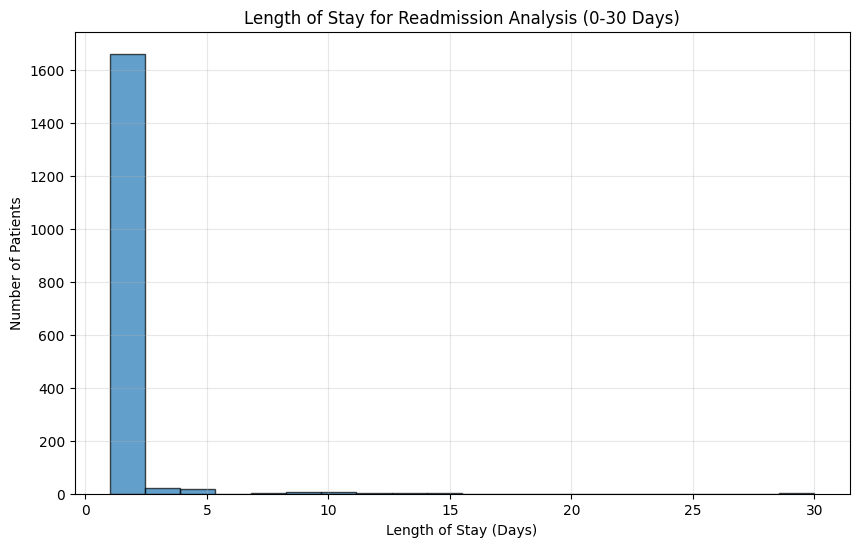

In [57]:
# visualize distribution
plt.figure(figsize=(10, 6))
plt.hist(readmission_data['length_of_stay'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Length of Stay for Readmission Analysis (0-30 Days)')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Number of Patients')
plt.grid(True, alpha=0.3)
plt.show()

In [61]:
# Calculate readmission 

# 1. Sort encounters by patient and date
readmission_data = readmission_data.sort_values(['PATIENT', 'START'])

# 2. Find next admission date for each patient
readmission_data['next_admission_date'] = readmission_data.groupby('PATIENT')['START'].shift(-1)

# 3. Calculate readmission flags
readmission_data['days_to_readmit'] = (readmission_data['next_admission_date'] - readmission_data['STOP']).dt.days
readmission_data['readmission_30_days'] = (readmission_data['days_to_readmit'] <= 30) & (readmission_data['days_to_readmit'] >= 0)


# 4. Calculate readmission rates
total_discharges = len(readmission_data)
readmissions = readmission_data['readmission_30_days'].sum()
readmission_rate = (readmissions / total_discharges) * 100

print(f"Readmission Statistics:")
print(f"Total discharges: {total_discharges}")
print(f"Readmissions within 30 days: {readmissions}")
print(f"Readmission rate: {readmission_rate:.2f}%")

Readmission Statistics:
Total discharges: 1724
Readmissions within 30 days: 534
Readmission rate: 30.97%
